In [1]:
import pandas as pd

### Loading the data

In [2]:
train=pd.read_csv("~/ML/security/knowledge_pit/cybersecurity_training/cybersecurity_training.csv")
train

,alert_ids,client_code,notified,categoryname,ip,ipcategory_name,ipcategory_scope,parent_category,grandparent_category,overallseverity,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
0,Nhq,DPM,0,Attack,YT.LB.32.21,INTERNET,Internet,7,A,3,...,4160,675,1,0,2,1,1,1,1,1
1,XZt,FIN,0,Exploit,192.SL.UK.94,PRIV-192,Private network,1,A,5,...,9,2,4,12,3,2,2,2,1,1
2,bBz,CHP,0,Attack,YT.LB.38.21,INTERNET,Internet,7,A,4,...,3788,628,1,0,2,2,1,2,2,1
3,ZNr,HPS,0,Attack,JX.NY.13.20,INTERNET,Internet,7,A,4,...,565,96,0,0,2,2,2,2,2,2
4,poV,OSC,0,Attack,YT.LB.32.21,INTERNET,Internet,7,A,4,...,2790,632,1,0,1,1,1,1,1,1
5,ZSX,QWB,0,Exploit,10.FM.RK.37,PRIV-10,Private network,1,A,4,...,13,2,0,0,3,2,1,3,2,1
6,TVd,IUO,0,Exploit,IJ.PI.86.150,INTERNET,Internet,7,A,4,...,172,46,1,0,1,1,1,1,1,1
7,xAY,GNI,0,Attack,YT.LB.32.21,INTERNET,Internet,7,A,5,...,2051,717,1,0,1,1,1,1,1,1
8,suH,TDM,0,Attack,EU.FS.44.4,INTERNET,Internet,7,A,4,...,217,10,1,0,1,1,1,1,1,1
9,JhL,GBU,0,Attack,YT.LB.38.21,INTERNET,Internet,7,A,5,...,3853,248,1,0,1,1,1,1,1,1


In [144]:
train['alert_ids'].value_counts()

bgj    1
wjZ    1
wba    1
sZW    1
XGv    1
ILz    1
zNR    1
FoI    1
LjD    1
rbr    1
XTp    1
QJb    1
pNk    1
Num    1
GoZ    1
byI    1
zzd    1
AYv    1
NAW    1
SGU    1
qMS    1
doA    1
zKW    1
CXz    1
jaA    1
pcF    1
eeq    1
Dgr    1
ZWe    1
etY    1
      ..
UDb    1
vfg    1
RbD    1
IMs    1
mfc    1
vWg    1
RWJ    1
YlS    1
gQX    1
oJH    1
WxI    1
RNr    1
tyy    1
QNG    1
fOm    1
zuD    1
NYh    1
pvD    1
ZCv    1
Dsb    1
rND    1
KiW    1
RFe    1
iIG    1
Klw    1
ijc    1
QBu    1
ndw    1
WyC    1
Vhx    1
Name: alert_ids, Length: 39427, dtype: int64

In [3]:
train.drop(['alert_ids'],axis=1,inplace=True)

In [4]:
label=train['notified']
train.drop(['notified'],axis=1,inplace=True)

### Converting rows from string type to float so that it can be suitable for training

In [5]:
from sklearn import preprocessing
for i in train.head():
    if train[str(i)].dtypes=="object":
        le = preprocessing.LabelEncoder()
        le.fit(train[str(i)])
        train[str(i)]=le.transform(train[str(i)])

### Replacing nan values with the mean and infinite values with the max float64 value.

In [6]:
import numpy as np
np.where(train.values >= np.finfo(np.float64).max)
#train[train==np.inf]=np.nan
train[train==np.inf]=np.finfo(np.float64).max
train.fillna(train.mean(), inplace=True)

d:\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


In [7]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
train, label = ros.fit_resample(train, label)

Using TensorFlow backend.


### Splitting the data

In [8]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(train, label, test_size=0.3, random_state=42)

### SVM

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear').fit(train_data, train_label)

In [82]:
svm_score=svm_linear.score(test_data,test_label)
print(svm_score)

0.9280581621438837


In [83]:
predictions = svm_linear.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11123
           1       0.21      0.08      0.11       706

    accuracy                           0.93     11829
   macro avg       0.58      0.53      0.54     11829
weighted avg       0.90      0.93      0.91     11829



### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf_logistic = LogisticRegression(solver="liblinear",max_iter=200).fit(train_data, train_label)

In [10]:
logistic_score = clf_logistic.score(test_data,test_label)
print(logistic_score)

0.6751603786281459


In [168]:
predictions = clf_logistic.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       0.82      0.45      0.58     11181
           1       0.62      0.90      0.73     11110

    accuracy                           0.68     22291
   macro avg       0.72      0.68      0.66     22291
weighted avg       0.72      0.68      0.66     22291



### kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train_data, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [12]:
knn_score = neigh.score(test_data,test_label)
print(knn_score)

0.8801309945718003


In [167]:
predictions = neigh.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       0.98      0.77      0.87     11181
           1       0.81      0.99      0.89     11110

    accuracy                           0.88     22291
   macro avg       0.90      0.88      0.88     22291
weighted avg       0.90      0.88      0.88     22291



### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_data, train_label)

In [14]:
forest_score = forest.score(test_data,test_label)
print(forest_score)

0.9925979094701898


In [165]:
predictions = forest.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11181
           1       0.99      1.00      0.99     11110

    accuracy                           0.99     22291
   macro avg       0.99      0.99      0.99     22291
weighted avg       0.99      0.99      0.99     22291



### Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

### Applying PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 40, whiten = True)
pca.fit(train_data)
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

### Logistic with PCA

In [17]:
clf_logistic = LogisticRegression(solver="liblinear",max_iter=200).fit(train_data, train_label)
logistic_score_pca = clf_logistic.score(test_data,test_label)
print(logistic_score_pca)

0.7130231932169934


In [172]:
predictions = clf_logistic.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69     11181
           1       0.68      0.80      0.73     11110

    accuracy                           0.71     22291
   macro avg       0.72      0.71      0.71     22291
weighted avg       0.72      0.71      0.71     22291



### kNN with PCA

In [18]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train_data, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [19]:
knn_score_pca = neigh.score(test_data,test_label)
print(knn_score_pca)

0.9076757435736396


In [175]:
predictions = neigh.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     11181
           1       0.85      0.99      0.91     11110

    accuracy                           0.91     22291
   macro avg       0.92      0.91      0.91     22291
weighted avg       0.92      0.91      0.91     22291



### Random Forest with PCA

In [20]:
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_data, train_label)

In [21]:
forest_score_pca = forest.score(test_data,test_label)
print(forest_score_pca)

0.9917006863756673


In [178]:
predictions = forest.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11181
           1       0.98      1.00      0.99     11110

    accuracy                           0.99     22291
   macro avg       0.99      0.99      0.99     22291
weighted avg       0.99      0.99      0.99     22291



### SVM with PCA

In [23]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear').fit(train_data, train_label)

In [26]:
svm_score_pca = svm_linear.score(test_data,test_label)
print(svm_score_pca)

0.7201561168184469


In [181]:
predictions = svm_linear.predict(test_data)
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68     11181
           1       0.68      0.84      0.75     11110

    accuracy                           0.72     22291
   macro avg       0.73      0.72      0.72     22291
weighted avg       0.73      0.72      0.72     22291



### Plot

In [27]:
with_pca=[]
without_pca=[]

In [28]:
with_pca.append(svm_score_pca)
with_pca.append(logistic_score_pca)
with_pca.append(knn_score_pca)
with_pca.append(forest_score_pca)
#without_pca.append(svm_score)
without_pca.append(0.6832661156923821)
without_pca.append(logistic_score)
without_pca.append(knn_score)
without_pca.append(forest_score)

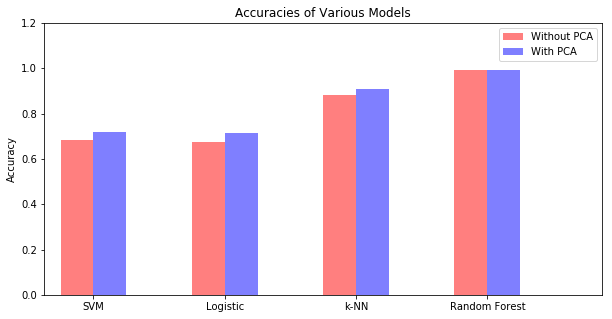

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
pos = list(range(len(with_pca))) 
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos,without_pca,width,alpha=0.5,color="red" ,label="Without PCA")
plt.bar([p + width for p in pos],with_pca,width,alpha=0.5,color="blue",label="With PCA")
ax.set_ylabel('Accuracy')
ax.set_title('Accuracies of Various Models')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(['SVM','Logistic','k-NN','Random Forest'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 1.2] )
plt.legend()
plt.savefig('accuracies.png',  bbox_inches='tight',dpi=250)
plt.show()

In [164]:
len(train)

74302

In [185]:
train.size

4532422

4532422